Saving UCI HAR Dataset.zip to UCI HAR Dataset.zip
Uploaded: UCI HAR Dataset.zip
Extracted to /content/
Folder exists: True
Train X: (7352, 561)  Train y: (7352, 1)
Test  X: (2947, 561)  Test  y: (2947, 1)
Train split: (5881, 561)  Val split: (1471, 561)  Test: (2947, 561)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       143,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,414 (724.27 KB)

 Trainable params: 185,414 (724.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6505 - loss: 0.8506 - val_accuracy: 0.9477 - val_loss: 0.1389
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9172 - loss: 0.2120 - val_accuracy: 0.9687 - val_loss: 0.0956
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9413 - loss: 0.1436 - val_accuracy: 0.9667 - val_loss: 0.0737
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9656 - loss: 0.1025 - val_accuracy: 0.9653 - val_loss: 0.0810
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9684 - loss: 0.0973 - val_accuracy: 0.9646 - val_loss: 0.0858
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9734 - loss: 0.0705 - val_accuracy: 0.9721 - val_loss: 0.0604
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9743 - loss: 0.0650 - val_accuracy: 0.9755 - val_loss: 0.0569
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9773 - loss: 0.0621 - val_accuracy: 0.9769 - val_loss:

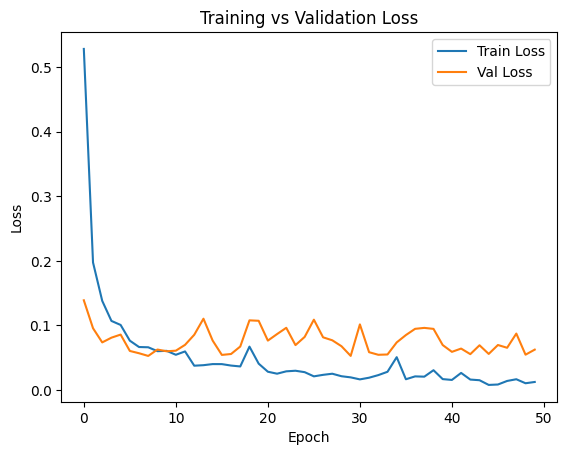

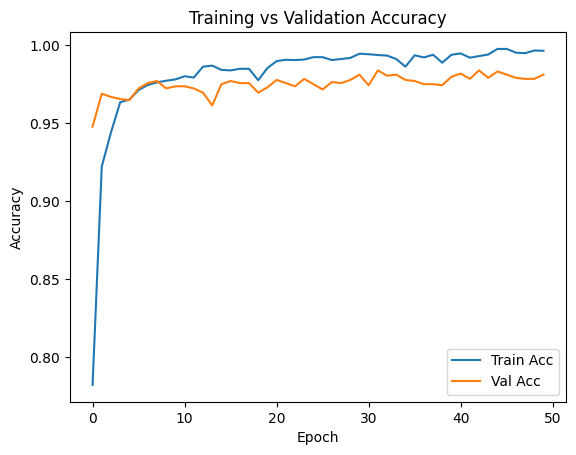

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

=== FCNN TEST RESULTS ===
Accuracy: 0.9437
Weighted F1: 0.9436

Confusion Matrix (rows=true, cols=pred):
     0    1    2    3    4    5
0  489    5    2    0    0    0
1   17  454    0    0    0    0
2   22   35  363    0    0    0
3    0    1    0  441   49    0
4    0    0    0   22  510    0
5    0    0    0    0   13  524

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       496
           1       0.92      0.96      0.94       471
           2       0.99      0.86      0.92       420
           3       0.95      0.90      0.92       491
           4       0.89      0.96      0.92       532
           5       1.00      0.98      0.99       537

    accuracy                           0.94      2947
   macro avg       0.95      0.94      0.94      2947
weighted avg       0.95      0.94      0.94      2947



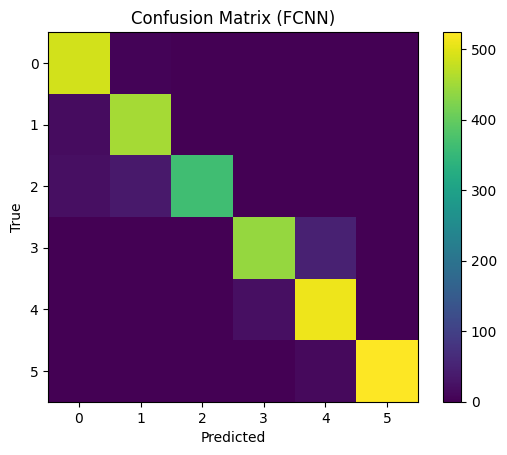


=== COMPARISON WITH 5.2 (CLASSICAL ML) ===
Best Classical ML (XGBoost) Accuracy (5.2): 0.5632
FCNN Accuracy (5.3): 0.9437
Difference (FCNN - XGBoost): 0.3805


In [1]:

!pip install -q tensorflow scipy scikit-learn

from google.colab import files
uploaded = files.upload()

zip_filename = list(uploaded.keys())[0]
print("Uploaded:", zip_filename)

import zipfile, os

with zipfile.ZipFile(zip_filename, 'r') as z:
    z.extractall("/content/")

print("Extracted to /content/")
print("Folder exists:", os.path.exists("/content/UCI HAR Dataset"))

import pandas as pd
import numpy as np

features = pd.read_csv("/content/UCI HAR Dataset/features.txt",
                       sep=r"\s+", header=None, names=["index","feature"])
features["feature"] = features["feature"].astype(str) + "_" + features.index.astype(str)
feature_names = features["feature"].values

X_train_raw = pd.read_csv("/content/UCI HAR Dataset/train/X_train.txt",
                          sep=r"\s+", header=None, names=feature_names)
y_train_df = pd.read_csv("/content/UCI HAR Dataset/train/y_train.txt",
                         header=None, names=["Activity"])

X_test_raw = pd.read_csv("/content/UCI HAR Dataset/test/X_test.txt",
                         sep=r"\s+", header=None, names=feature_names)
y_test_df = pd.read_csv("/content/UCI HAR Dataset/test/y_test.txt",
                        header=None, names=["Activity"])

print("Train X:", X_train_raw.shape, " Train y:", y_train_df.shape)
print("Test  X:", X_test_raw.shape,  " Test  y:", y_test_df.shape)

y_train = (y_train_df["Activity"].values - 1).astype(int)
y_test  = (y_test_df["Activity"].values - 1).astype(int)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_raw.values, y_train, test_size=0.2, random_state=42, stratify=y_train
)

scaler = StandardScaler()
X_tr  = scaler.fit_transform(X_tr)
X_val = scaler.transform(X_val)
X_te  = scaler.transform(X_test_raw.values)

print("Train split:", X_tr.shape, " Val split:", X_val.shape, " Test:", X_te.shape)

import tensorflow as tf
from tensorflow.keras import layers, models

tf.random.set_seed(42)

num_features = X_tr.shape[1]
num_classes = 6

model = models.Sequential([
    layers.Input(shape=(num_features,)),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()
EPOCHS = 50

history = model.fit(
    X_tr, y_tr,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=64,
    verbose=1
)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

# Evaluation: Accuracy, F1, Confusion Matrix
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

y_proba = model.predict(X_te)
y_pred = np.argmax(y_proba, axis=1)

acc = accuracy_score(y_test, y_pred)
f1w = f1_score(y_test, y_pred, average="weighted")

print("\n=== FCNN TEST RESULTS ===")
print(f"Accuracy: {acc:.4f}")
print(f"Weighted F1: {f1w:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix (rows=true, cols=pred):")
print(pd.DataFrame(cm))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix (FCNN)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
plt.show()


# Comparison with Deliverable 5.2
# (Use your best classical model result)
xgb_acc_52 = 0.5632
print("\n=== COMPARISON WITH 5.2 (CLASSICAL ML) ===")
print(f"Best Classical ML (XGBoost) Accuracy (5.2): {xgb_acc_52:.4f}")
print(f"FCNN Accuracy (5.3): {acc:.4f}")
print(f"Difference (FCNN - XGBoost): {(acc - xgb_acc_52):.4f}")
